### Transformer Model on Twitter.csv With Transfer Learning

In [1]:
! pip install transformers

In [2]:
from transformers import pipeline
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.metrics import f1_score, confusion_matrix

c:\Users\bhave\anaconda3\envs\pytorch_env_assign\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [4]:
type(classifier)

transformers.pipelines.text_classification.TextClassificationPipeline

In [5]:
import torch

In [6]:
torch.cuda.is_available()

True

In [7]:
torch.cuda.current_device()

0

In [8]:
classifier = pipeline("sentiment-analysis", device=0)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [9]:
df_ = pd.read_csv('./Assign06/Tweets.csv')

In [10]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [11]:
df = df_[['airline_sentiment', 'text']].copy()

<Axes: >

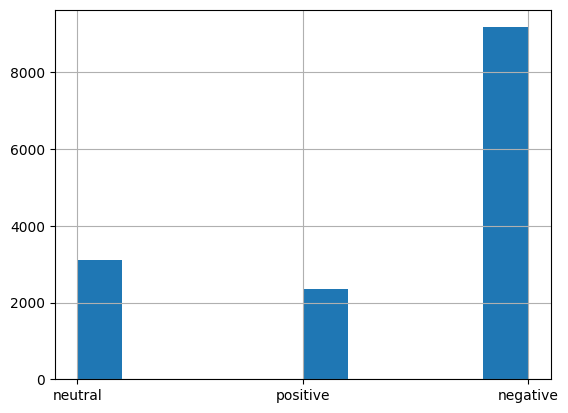

In [12]:
df['airline_sentiment'].hist()

In [13]:
df = df[df.airline_sentiment != 'neutral'].copy()

In [14]:
target_map = {'positive': 1, 'negative': 0}
df['target'] = df['airline_sentiment'].map(target_map)

In [15]:
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [16]:
len(df)

11541

In [17]:
texts = df['text'].tolist()
predictions = classifier(texts) # No need forloop.

In [18]:
predictions

[{'label': 'POSITIVE', 'score': 0.6070829629898071},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854250550270081},
 {'label': 'POSITIVE', 'score': 0.9553211331367493},
 {'label': 'POSITIVE', 'score': 0.9827088117599487},
 {'label': 'POSITIVE', 'score': 0.9994851350784302},
 {'label': 'POSITIVE', 'score': 0.9993509650230408},
 {'label': 'POSITIVE', 'score': 0.9940821528434753},
 {'label': 'POSITIVE', 'score': 0.9863133430480957},
 {'label': 'POSITIVE', 'score': 0.9996304512023926},
 {'label': 'NEGATIVE', 'score': 0.9980512857437134},
 {'label': 'POSITIVE', 'score': 0.9964436888694763},
 {'label': 'NEGATIVE', 'score': 0.9968666434288025},
 {'label': 'POSITIVE', 'score': 0.9787647724151611},
 {'label': 'POSITIVE', 'score': 0.9995218515396118},
 {'label': 'NEGATIVE', 'score': 0.9954516291618347},
 {'label': 'POSITIVE', 'score': 0.9995624423027039},
 {'label': 'POSITIVE', 'score': 0.999874830245

In [19]:
preds = [1 if d['label'].startswith('P') else 0 for d in predictions] # will return 1 if the label starts with p
                                                                      # otherwise return 0.

In [20]:
preds = np.array(preds)

In [21]:
print("acc:", np.mean(df['target'] == preds))

acc: 0.8898708950697514


In [22]:
conf_mat = confusion_matrix(df['target'], preds, normalize='true')

In [23]:
conf_mat

array([[0.90117673, 0.09882327],
       [0.15404147, 0.84595853]])

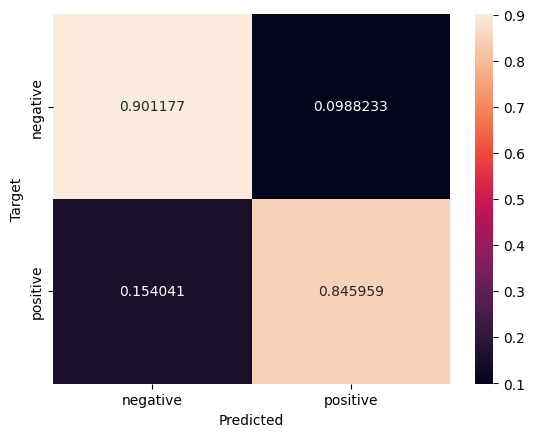

In [24]:
def plot_cm(cm):
  classes = ['negative', 'positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(conf_mat)

In [25]:
f1_score(df['target'], preds)

0.758777756690074

### Transformer Model on Twitter.csv With Fine Tuning

In [26]:
! pip install datasets

In [27]:
import pandas as pd
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer

In [28]:
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [29]:
data = {"sentence": df["text"].tolist(),
        "label": df["target"].tolist(),
        "idx": list(range(len(df)))}

In [30]:
# Split the dataset into train, validation, and test sets
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

train_size = int(train_ratio * len(data["sentence"]))
val_size = int(val_ratio * len(data["sentence"]))

train_data = {key: value[:train_size] for key, value in data.items()}
val_data = {key: value[train_size:train_size + val_size] for key, value in data.items()}
test_data = {key: value[train_size + val_size:] for key, value in data.items()}

In [31]:
train_size

9232

In [32]:
# Create Dataset objects
train_dataset = Dataset.from_dict(train_data)
val_dataset = Dataset.from_dict(val_data)
test_dataset = Dataset.from_dict(test_data)

In [33]:
train_dataset

Dataset({
    features: ['sentence', 'label', 'idx'],
    num_rows: 9232
})

In [34]:
dir(train_dataset)

['_TF_DATASET_REFS',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getitems__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_local_temp_path',
 '_check_index_is_initialized',
 '_data',
 '_estimate_nbytes',
 '_fingerprint',
 '_format_columns',
 '_format_kwargs',
 '_format_type',
 '_generate_tables_from_cache_file',
 '_generate_tables_from_shards',
 '_get_cache_file_path',
 '_get_output_signature',
 '_getitem',
 '_indexes',
 '_indices',
 '_info',
 '_map_single',
 '_new_dataset_with_indices',
 '_output_all_columns',
 '_push_parquet_shards_to_hub',
 '_save_to_disk_single',
 '_select_contiguous',
 '_select_wi

In [35]:
train_dataset.data

InMemoryTable
sentence: string
label: int64
idx: int64
----
sentence: [["@VirginAmerica plus you've added commercials to the experience... tacky.","@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse","@VirginAmerica and it's a really big bad thing about it","@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA","@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",...,"@USAirways @AmericanAir you make Spirit look like the gem of air travel. You haven't handle this winter storm very well...","@USAirways thanks for the reply, hoping everything is cleared up in Charlotte by Monday","@USAirways it takes a month?","Yes, I filed a report in Atlanta. My bags are in Charlotte, NC. 24 hours Late Flightr and still can't find my luggage ... @USAirways","@USAirways it was supposed to be a carry on and in Pittsburg

In [36]:
train_dataset[9000:9005]

{'sentence': ["@USAirways a flight update doesn't help when we are waiting 20+ min at our arrival waiting for a plane to leave our gate. Who can I write?😑",
  '@USAirways TYVM USAir, Happy Night@ &lt;3',
  "@USAirways thanks! It's hectic for everyone but their actions don't represent the company well IMO",
  '@USAirways @husainhaqqani Mr. Husain u shld protest as well when one of ur party member Rehman Malik delayed a PIA flight for hours..???',
  '@USAirways NOT GOOD. been on hold for 1hour (2x/day) since sun. to book 1-way flt dividend miles. agents send me to on hold hell. #furious'],
 'label': [0, 1, 1, 0, 0],
 'idx': [9000, 9001, 9002, 9003, 9004]}

In [37]:
train_dataset.features

{'sentence': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 'idx': Value(dtype='int64', id=None)}

In [38]:
checkpoint ="distilbert-base-uncased" # It trains faster
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [39]:
tokenized_sentences = tokenizer(train_dataset[0:3]['sentence']) # to check tokenizer on subsamples of sentences
from pprint import pprint
pprint(tokenized_sentences) # we can see that there is no token ids in distilled bert.

{'attention_mask': [[1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1],
                    [1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
                     1,
               

### Creating tokenize_fn to pass argument truncation = True

In [40]:
def tokenize_fn(batch): # Token ids are only for bert but not for distilbert .Define function to pass an argument that truncation = True. so we wrap
                        # tokenizer with the function
  return tokenizer(batch['sentence'], truncation = True)

#### Map Tokenize function

In [41]:
tokenized_datasets_train = train_dataset.map(tokenize_fn, batched = True) # to map tokenize function to tain dataset
tokenized_datasets_val = val_dataset.map(tokenize_fn, batched = True) # to map tokenize function to val dataset
tokenized_datasets_test = test_dataset.map(tokenize_fn, batched = True) # to map tokenize function to test dataset

Map:  32%|███▏      | 3000/9232 [00:00<00:01, 4333.27 examples/s]

Map: 100%|██████████| 1155/1155 [00:00<00:00, 4121.39 examples/s]


In [42]:
from transformers import TrainingArguments # importing training argument class


In [43]:
training_args = TrainingArguments(
    'my_trainer',
    evaluation_strategy='epoch',  # means if we want to evaluate model on validation set
    save_strategy='epoch',# means save model after every epoch which is not a good idea because you will runout of colab space
    num_train_epochs= 5,
)

In [44]:
from transformers import AutoModelForSequenceClassification

In [45]:
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels =2
)

c:\Users\bhave\anaconda3\envs\pytorch_env_assign\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\bhave\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of DistilBertForSequenceClassification were not initialized from the model check

In [46]:
type(model)

transformers.models.distilbert.modeling_distilbert.DistilBertForSequenceClassification

In [47]:
model # information about model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [48]:
! pip install torchinfo

In [49]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              23,440,896
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           1,538
├─Dropout: 1-4                                          --
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0

In [50]:
! pip install evaluate

   ---------------------------------------- 0.0/84.1 kB ? eta -:--:--
   -------------- ------------------------- 30.7/84.1 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 84.1/84.1 kB 947.3 kB/s eta 0:00:00


In [51]:
from evaluate import load
metric = load('glue', 'sst2')

In [52]:
metric.compute(predictions =[1,0,1], references = [1,0,0]) # pass the dummy task to see the performances. references = labels

{'accuracy': 0.6666666666666666}

In [53]:
def compute_metrics(logits_and_labels): # our own function to compute matrics rather than using hugging face metric.
                                        # we are passing tuple called logits_and_labels.
    logits, labels = logits_and_labels  # Tuple unpacking
    predictions = np.argmax(logits, axis = -1)
    return metric.compute(predictions = predictions, references = labels)

#### Create Trainer object to set training parameters

In [55]:
from transformers import Trainer

In [57]:
trainer = Trainer(
    model,
    training_args,
    train_dataset = tokenized_datasets_train,
    eval_dataset = tokenized_datasets_val,
    tokenizer = tokenizer,
    compute_metrics = compute_metrics,
)

c:\Users\bhave\anaconda3\envs\pytorch_env_assign\lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [58]:
trainer.train()  # Training with five epoch

  9%|▊         | 502/5770 [00:50<08:58,  9.78it/s]

{'loss': 0.2609, 'grad_norm': 9.709702491760254, 'learning_rate': 4.566724436741768e-05, 'epoch': 0.43}


 17%|█▋        | 1002/5770 [01:38<07:37, 10.42it/s]

{'loss': 0.2305, 'grad_norm': 0.1451370269060135, 'learning_rate': 4.133448873483536e-05, 'epoch': 0.87}


                                                   
 20%|██        | 1154/5770 [01:57<07:25, 10.37it/s]

{'eval_loss': 0.1595996618270874, 'eval_accuracy': 0.9471403812824957, 'eval_runtime': 3.849, 'eval_samples_per_second': 299.816, 'eval_steps_per_second': 37.672, 'epoch': 1.0}


 26%|██▌       | 1501/5770 [02:33<07:06, 10.01it/s]  

{'loss': 0.1491, 'grad_norm': 0.018843552097678185, 'learning_rate': 3.700173310225303e-05, 'epoch': 1.3}


 35%|███▍      | 2001/5770 [03:22<06:19,  9.92it/s]

{'loss': 0.119, 'grad_norm': 0.14105021953582764, 'learning_rate': 3.2668977469670715e-05, 'epoch': 1.73}


                                                   
 40%|████      | 2308/5770 [03:55<05:35, 10.33it/s]

{'eval_loss': 0.1847868114709854, 'eval_accuracy': 0.9566724436741768, 'eval_runtime': 3.423, 'eval_samples_per_second': 337.132, 'eval_steps_per_second': 42.361, 'epoch': 2.0}


 43%|████▎     | 2501/5770 [04:16<05:25, 10.05it/s]

{'loss': 0.0998, 'grad_norm': 0.026288433000445366, 'learning_rate': 2.833622183708839e-05, 'epoch': 2.17}


 52%|█████▏    | 3002/5770 [05:04<04:29, 10.28it/s]

{'loss': 0.052, 'grad_norm': 12.345677375793457, 'learning_rate': 2.4003466204506068e-05, 'epoch': 2.6}


                                                   
 60%|██████    | 3462/5770 [05:55<04:16,  9.00it/s]

{'eval_loss': 0.236467644572258, 'eval_accuracy': 0.9523396880415944, 'eval_runtime': 4.9013, 'eval_samples_per_second': 235.447, 'eval_steps_per_second': 29.584, 'epoch': 3.0}


 61%|██████    | 3502/5770 [06:01<03:52,  9.74it/s]  

{'loss': 0.0462, 'grad_norm': 0.007457869593054056, 'learning_rate': 1.9670710571923746e-05, 'epoch': 3.03}


 69%|██████▉   | 4002/5770 [06:50<02:50, 10.38it/s]

{'loss': 0.0134, 'grad_norm': 0.003016101196408272, 'learning_rate': 1.5337954939341424e-05, 'epoch': 3.47}


 78%|███████▊  | 4502/5770 [07:40<02:04, 10.21it/s]

{'loss': 0.0179, 'grad_norm': 0.004269897006452084, 'learning_rate': 1.1005199306759099e-05, 'epoch': 3.9}


                                                   
 80%|████████  | 4616/5770 [07:54<01:50, 10.41it/s]

{'eval_loss': 0.2777653634548187, 'eval_accuracy': 0.951473136915078, 'eval_runtime': 3.4962, 'eval_samples_per_second': 330.069, 'eval_steps_per_second': 41.473, 'epoch': 4.0}


 87%|████████▋ | 5002/5770 [08:33<01:16, 10.10it/s]

{'loss': 0.0087, 'grad_norm': 0.0019387693610042334, 'learning_rate': 6.672443674176777e-06, 'epoch': 4.33}


 95%|█████████▌| 5501/5770 [09:22<00:27,  9.83it/s]

{'loss': 0.0076, 'grad_norm': 0.004731851629912853, 'learning_rate': 2.339688041594454e-06, 'epoch': 4.77}


                                                   
100%|██████████| 5770/5770 [10:02<00:00,  4.72it/s]

{'eval_loss': 0.2986851632595062, 'eval_accuracy': 0.951473136915078, 'eval_runtime': 7.472, 'eval_samples_per_second': 154.443, 'eval_steps_per_second': 19.406, 'epoch': 5.0}


100%|██████████| 5770/5770 [10:05<00:00,  9.53it/s]

{'train_runtime': 605.3482, 'train_samples_per_second': 76.254, 'train_steps_per_second': 9.532, 'train_loss': 0.08723752451108274, 'epoch': 5.0}


TrainOutput(global_step=5770, training_loss=0.08723752451108274, metrics={'train_runtime': 605.3482, 'train_samples_per_second': 76.254, 'train_steps_per_second': 9.532, 'train_loss': 0.08723752451108274, 'epoch': 5.0})

In [59]:
trainer.save_model('twitter_sentiment_model') # saving model

In [64]:
from transformers import pipeline

In [65]:
newmodel = pipeline('text-classification', model = 'twitter_sentiment_model', device =0)  # How to use our trained model

In [66]:
newmodel('This deep learning course is great')

[{'label': 'LABEL_1', 'score': 0.999664306640625}]

In [67]:
newmodel('This topic is difficult') # The labels name is 'label_1' which is generic

[{'label': 'LABEL_0', 'score': 0.999980092048645}]

In [68]:
import json

In [69]:
config_path = 'twitter_sentiment_model/config.json' # with these line of commands we config our own labels to same path
with open(config_path) as f:
  j = json.load(f)

j['id2label'] = {0: 'negative', 1:'positive'}  # labels mapping

with open(config_path,'w') as f:
  json.dump(j,f,indent = 2)

In [71]:
newmodel = pipeline('text-classification', model = 'twitter_sentiment_model', device =0) # Loading our pipeline again after model configuration

In [87]:
newmodel('I like deeplearning') # Now after configuration we get the acceptable form of label names.

[{'label': 'positive', 'score': 0.9979845285415649}]

In [89]:
predictions = newmodel(tokenized_datasets_test['sentence'])

In [90]:
predictions

[{'label': 'negative', 'score': 0.9998865127563477},
 {'label': 'positive', 'score': 0.9976414442062378},
 {'label': 'negative', 'score': 0.9999849796295166},
 {'label': 'positive', 'score': 0.9994543194770813},
 {'label': 'negative', 'score': 0.9999833106994629},
 {'label': 'positive', 'score': 0.9996902942657471},
 {'label': 'negative', 'score': 0.9996424913406372},
 {'label': 'negative', 'score': 0.9999865293502808},
 {'label': 'negative', 'score': 0.9999812841415405},
 {'label': 'positive', 'score': 0.9996141195297241},
 {'label': 'negative', 'score': 0.9999854564666748},
 {'label': 'negative', 'score': 0.999987006187439},
 {'label': 'negative', 'score': 0.9999843835830688},
 {'label': 'negative', 'score': 0.9999841451644897},
 {'label': 'negative', 'score': 0.986683189868927},
 {'label': 'negative', 'score': 0.9999850988388062},
 {'label': 'negative', 'score': 0.9999855756759644},
 {'label': 'positive', 'score': 0.9982319474220276},
 {'label': 'negative', 'score': 0.99991941452026

In [97]:
preds = [1 if d['label'].startswith('P') else 0 for d in predictions] # will return 1 if the label starts with p
                                                                      # otherwise return 0.
preds = np.array(preds)

In [98]:
print("acc:", np.mean(tokenized_datasets_test['label'] == preds))

acc: 0.8900432900432901


In [105]:
f1_score(tokenized_datasets_test['label'], preds, average='weighted')

0.8382634009752654

The accuracy and the f1 socre for the fine tuned model on the twitter.csv sentiment analysis has increased when compared to transfer learning.